# ECE 685D, Fall 2021
## Problem Set 1 
* ### __Important :__  You are only allowed to use built in functions for generating uniform random variables.

## Full name: Teaching Staff


In [1]:
# Import some useful packages 
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from math import gamma 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri

### Problem 1A: Exponential Distribution

### Put your derivation for the distribution of $Y$ here:

$F_Y(y) = P(Y \leq y) = P(-\frac{1}{\lambda} \text{ln} (1-U) \leq y) = P(U \leq 1 - e^{-\lambda y})$

Because $U$ is uniform distributed, $P(U\leq u) = u$ on the support $u>0$. Thus, $P(U \leq 1 - e^{-\lambda y}) = 1 - e^{-\lambda y}$, $y>0$.

From above, we know that the cdf of Y is $1 - e^{-\lambda y}$ with $y>0$ and $Y=0$ with $y \leq 0$. 

We can derive the pdf of Y $f_Y(y) = \frac{\partial F_Y(y)}{\partial y} = \lambda e^{-\lambda y}$ with $y>0$ and $f_Y(y) = 0$ with $y \leq 0$.

Intuitively, $\lambda = 1$. Thus, $Y \sim Exp(1)$

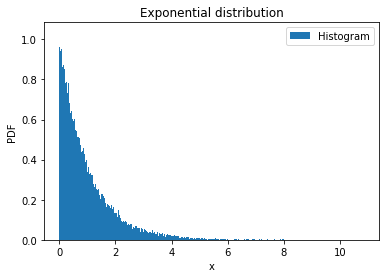

In [2]:
# Put your code here 
""" Exponential r.v. generator as a function """
def exp_gen(lamda, shape):
    """
    lam: distribution parameter
    shape: shape of the output r.v.
    """
    # Generate a uniformly distributed vector with shape
    U = np.random.uniform(0, 1, shape)
    
    # Generate Exp(lamda)
    X = -1/lamda * np.log(1-U)
    return X

""" Plotting the histogram """
# Choose a parameter lambda
lamda = 1
# Generate 10^5 samples from Exp(lamda)
X = exp_gen(lamda, shape=(10**5, 1))
# Plot the histogram of the obtained samples 
bin_width = .01
bins = np.arange(min(X), max(X) + bin_width, bin_width)
_, x_axis, _ = plt.hist(X, bins=bins, density=True, label='Histogram')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Exponential distribution')
plt.legend()
plt.show()


### Problem 1B: Beta Distribution

### Put your derivation for the distributions of the minimum $U_{(1)}$ and maximum $U_{(n)}$ here:

$f_U(u) = 1, 0<u<1; f_U(u)=0, \text{otherwise}$. $F_U(u) = u, 0<u<1, F_U(u)=0; \text{otherwise}$.

- Derive $U_{(1)}$

$F_{U_{(1)}}(u) = P(U_{(1)} \leq u) = 1 - P(U_{(1)} > u) = 1 - P(U_1 > u, ..., U_n > u) = 1 - P(U_1 > u)P(U_2>u)...P(U_n>u)$ 

$=1-(1-P(U_1 \leq u))...(1-P(U_n \leq u)) = 1 - (1-F(u))^n$

$f_{U_{(1)}}(u) = \frac{\partial F_{U_{(1)}}(u)}{\partial u} = nf(u)(1-F(u))^{n-1}=n(1-u)^{n-1} = \frac{\Gamma(1+n)}{\Gamma(1)\Gamma(n)}u^{1-1}(1-u)^{n-1}$ where $0<u<1$.

$f_{U_{(1)}}(u) =0$, $u$ otherwise. 

Thus, $U_{(1)} \sim Beta(1,n)$

- Derive $U_{(n)}$

$F_{U_{(n)}}(u) = P(U_{(n)} \leq u) = P(U_1 \leq u, ..., U_n \leq u) = P(U_1 \leq u)...P(U_n\leq u) = F(u)^n$

$f_{U_{(n)}}(u) = \frac{\partial F_{U_{(n)}}(u)}{\partial u} = nf(u)F(u)^{(n-1)}=nu^{(n-1)} = \frac{\Gamma(n+1)}{\Gamma(n)\Gamma(1)}u^{n-1}(1-u)^{1-1}$ where $0<u<1$.

$f_{U_{(n)}}(u) =0$, $u$ otherwise. 

Thus, $U_{(n)} \sim Beta(n,1)$

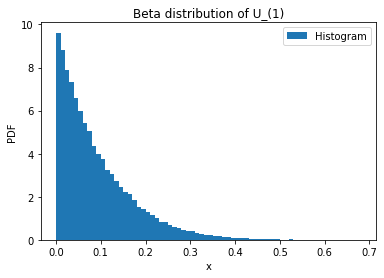

In [3]:
# Put your code here 

""" Beta r.v. generator as a function """
def beta_gen(alpha1, alpha2, shape):
    """
    alpha1, alpha2 are the dist. parameters 
    shape: desired shape of the output array
    """
    n = alpha2 + alpha1 - 1 
    # Generate n i.i.d. samples from Unif(0,1)
    u, v = shape
    U = np.random.uniform(0, 1, (n, u, v))
    # Compute alpha1-th order stat. of U 
    mu = np.sort(U, axis=0)[alpha1-1,:]
    
    return mu 

""" Plotting the histogram """
# Choose parameters 
alpha1, alpha2 = 1, 10 
# Generate 10^5 samples from Beta(alpha1, alpha2)
mu = beta_gen(alpha1, alpha2, (10**5, 1))
# Plot the histogram of the obtained samples 
bins = np.arange(min(mu), max(mu) + bin_width, bin_width)
_, x_axis, _ = plt.hist(mu, bins=bins, density=True, label='Histogram')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Beta distribution of U_(1)')
plt.legend()
plt.show()

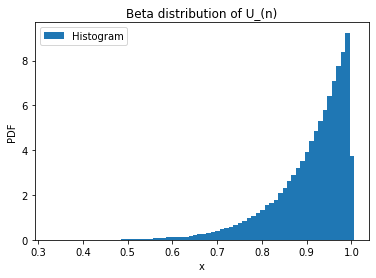

In [4]:
# Choose parameters 
alpha1, alpha2 = 10, 1 
# Generate 10^5 samples from Beta(alpha1, alpha2)
mu = beta_gen(alpha1, alpha2, (10**5, 1))
# Plot the histogram of the obtained samples 
bins = np.arange(min(mu), max(mu) + bin_width, bin_width)
_, x_axis, _ = plt.hist(mu, bins=bins, density=True, label='Histogram')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Beta distribution of U_(n)')
plt.legend()
plt.show()

### Problem 1C: Dirichlet Distribution

### Put your proof for $N=2$ here:

$\mu_1 + \mu_2 = 1 \Rightarrow \mu_2 = 1 - \mu_1$.

For $\mu_i \in (0,1), i=1,2$,

$f_{\mu}(\mu_1, \mu_2) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma{(\alpha_1)} \Gamma{(\alpha_2})} \mu_1^{\alpha_1-1}(\mu_2)^{\alpha_2-1} \Rightarrow f_{\mu}(\mu_1) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma{(\alpha_1)} \Gamma{(\alpha_2})} \mu_1^{\alpha_1-1}(1-\mu_1)^{\alpha_2-1}$ follows $\text{Beta}(\alpha_1, \alpha_2)$. Parameters are $\alpha_1, \alpha_2$.

### Problem 2A: Standard Bivariate Gaussian Distribution

In [3]:
# Put your code here 

""" Standard bivariate normal r.v. generator as a function """
def twoDimCircGauss_gen(no_samples):
    """
    no_samples: number of samples
    """
    # Generate two uniformly distributed vectors stored in the array U with shape (no_samples,2)
    U = np.random.uniform(0, 1, (no_samples,2))
    
    # Allocate an empty array 
    Z = np.empty(shape=(no_samples,2))
    
    # Use Box-Muller method
    Theta, R = 2*np.pi*U[:,0], np.sqrt( -2*np.log(U[:,1]) )
    Z[:,0] = np.multiply(R, np.cos(Theta))
    Z[:,1] = np.multiply(R, np.sin(Theta))
    
    return Z

### Put your derivation for the distributions of $\Theta$ and $R^2$ here:

The CDF of a random variable $Y$ is defined as $F_Y(y) = P(Y\leq y)$.

Let $Y = 2\pi U$ where $U\sim\text{Unif}(0,1)$. We have:
\begin{align*}
P_Y(y) & = P(Y\leq y)\\
& = P(2\pi U \leq y)\\
& = P\left( U \leq \frac{y}{2\pi} \right)\\
& = F_U\left(\frac{y}{2\pi}\right)\\
& = \begin{cases}
                  0               & \text{for } y < 0 \\
                  \frac{y}{2\pi} & \text{for } y \in[0,2\pi]\\
                  1               & \text{for } y > 2\pi
           \end{cases}
\end{align*}
The PDF $f_Y(y)$ can be found by differentiating $F_Y(y)$ w.r.t. $y$; we obtain
$$f_Y(y) = \frac{1}{2\pi}\quad\text{for}\quad y\in[0,2\pi].$$

Similarly, if we let $Y = R^2 = -2\log(U)$, we obtain:
\begin{align*}
P_Y(y) & = P(Y\leq y)\\
& = P(-2\log(U) \leq y)\\
& = P\left( U \geq \exp\left(-\frac{y}{2}\right) \right)\\
& = 1 - P\left(U<\exp\left(-\frac{y}{2}\right)\right)\\
& = 1 - \exp\left(-\frac{y}{2}\right),
\end{align*}
that is, $R^2$ is exponentially distributed random variable with rate $\frac{1}{2}$; its PDF is 
$$f_Y(y) = \frac{1}{2}\exp\left(-\frac{y}{2}\right)\quad y\geq 0$$

### Problem 2B: 

### Put your proof here:

Let $X\sim\mathcal{N}(\mu,\Sigma)$ be a $D$-dimensional Gaussian random vector with mean $\mu$ and covariance matrix $\Sigma$. Let $Y=AX+b$ where $A$ is a square matrix and $b$ is a vector. Then, $Y$ also follows Gaussian distribution with the following mean vector and covariance matrix:

\begin{align*}
            \mathbb{E}[Y] & = \mathbb{E}[AX + b] = A\mathbb{E}[X] + b = A\mu + b\\
            \text{Cov}[Y] & = \mathbb{E}[(Y-\mathbb{E}[Y])(Y-\mathbb{E}[Y])^\top]\\
            & = \mathbb{E} [( ({A}X+{b})-({A}{\mu} + {b}) ) ( ({A}X+{b})-({A}{\mu} + {b}) ) ^\top ] \\
            & = \mathbb{E} [ ( {A}(X-{\mu}) )( {A}(X-{\mu}) ) ^\top ] \\
            & = \mathbb{E} [ {A}(X-{\mu}) (X-{\mu})^\top {A}^\top ] \\
            & = {A} \mathbb{E} [(X-{\mu}) (X-{\mu})^\top  ] {A}^\top \\
            & = {A}{\Sigma}{A}^\top.
        \end{align*}

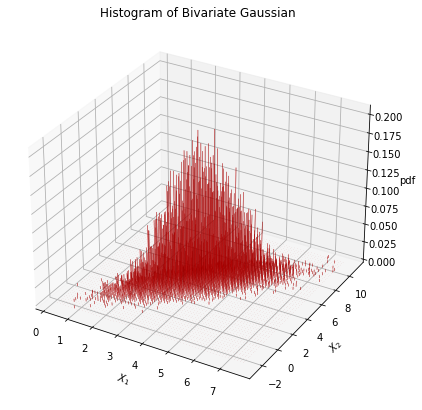

In [8]:
# Put your code here 
import numpy as np
import matplotlib.pyplot as plt
""" Bivariate normal r.v. generator as a function """
def twoDimColorGauss_gen(mu, Sigma, no_samples):
    """
    mu: mean vector of shape (2,1)
    Sigma: covariance matrix of shape (2,2)
    no_samples: number of samples
    """
    # Generate no_samples from standard bivariate normal distribution and store them in the array Z with shape (no_samples,2)
    Z = twoDimCircGauss_gen(no_samples)
    
    # Eigendecomposition of Sigma: the columns of U are the orthonormal eigenvectors, and Lambda holds the corresponsing eigenvalues
    Lambda, U = np.linalg.eig(Sigma)
    # Compute the transformation matrix A = U*diag(Lambda)^(1/2)U^T
    A = np.matmul( U, np.matmul(np.diag(np.sqrt(Lambda)),np.transpose(U)) )
    
    return np.matmul(A,np.expand_dims(Z,2)).squeeze(-1) + np.repeat(mu.T, no_samples, axis=0)

mu, Sigma = np.array([[4],[4]]), np.array([[1,1.5],[1.5,3]])
X = twoDimColorGauss_gen(mu, Sigma, 10**4)

# plot the histogram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=65, normed=True)
mu1, mu2 = np.meshgrid(xedges[:-1], yedges[:-1] , indexing="ij")
xpos = mu1.ravel()
ypos = mu2.ravel()
zpos = 0
dx = dy = 0.01 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='r', shade=True)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('pdf')
ax.set_title('Histogram of Bivariate Gaussian')
plt.show()


In [9]:
np.shape(X)

(10000, 2)